In [14]:
# подключим библиотеки
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as st

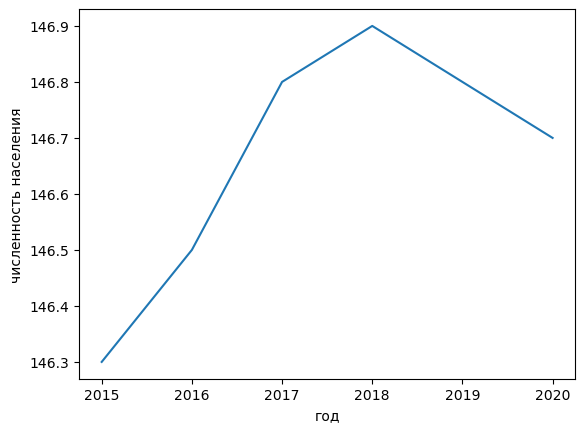

In [15]:
# введем данные
x = np.array([2015, 2016, 2017, 2018, 2019, 2020]).reshape((-1, 1))
y = np.array([146.3, 146.5, 146.8, 146.9, 146.8, 146.7]).reshape((-1, 1))
#Построим график
plt.xlabel("год")
plt.ylabel("численность населения")
plt.plot(x, y)
plt.show()

In [16]:
# создаем модель линейной регрессии к существующим данным
model = LinearRegression().fit(x, y)
# найдем коэффициент детерминации
r_sq = model.score(x, y)
y_ = np.array(x * model.coef_ + model.intercept_)#значения по регрессии
print("Коэффициент детерминации:", r_sq)

Коэффициент детерминации: 0.5075187969924189


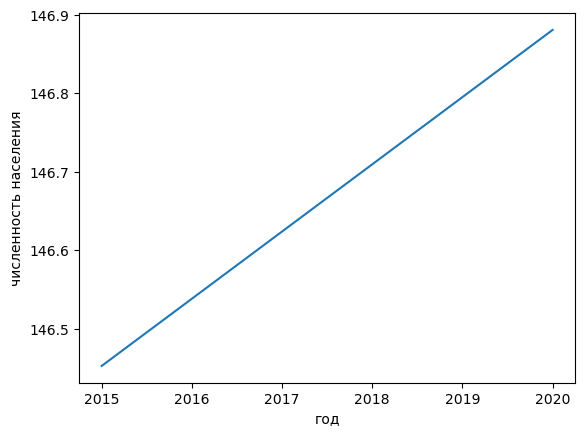

In [17]:
# построим график с учетом регрессии
plt.xlabel("год")
plt.ylabel("численность населения")
plt.plot(x, y_)
plt.show()

In [18]:
#Проведем статистические тесты значимости результата
yy_ = np.array(y - y_).flatten() # ошибка регрессии
y_len_1_3 = round(len(y_)/3) # 1/3 выборки
shapiro = st.shapiro(yy_) # Тест Шапиро-Уилка для распределения ошибок
bartlett = st.bartlett(yy_[0:y_len_1_3], yy_[2*y_len_1_3:]) # тест Бартлета 

In [19]:
if r_sq > 0.7 and shapiro[1] < 0.05 and bartlett[1] < 0.05:
    print ("численность населения будет снижаться:",
          int(np.ceil((2 - model.intercept_) / model.coef_)[0]))
else:
    print ("численность населения будет возрастать")

численность населения будет возрастать
